In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import random

In [4]:
class ErdosRenyi:
    def __init__(self, n, p):
        """Initializes an Erdos-Renyi graph

        Args:
        n (int): Number of nodes in the graph
        p (float): Probability of connection between any two nodes
        """
        self.G = nx.Graph()
        self.n = n
        self.p = p

        self.G.add_nodes_from(range(self.n))

        for i in range(n):
            for j in range(i + 1, n):
                if random() < self.p:
                    self.G.add_edge(i, j)

    def average_clustering_coefficient(self):
        """Calculates average clustering coefficient of the graph G

        Returns:
        Returns the average clustering coefficient
        """
        return nx.algorithms.cluster.average_clustering(self.G)

    def average_path_length(self):
        """Calculates average path length of the graph G

        Returns:
        float: Average path length in graph G
        """
        return nx.average_shortest_path_length(self.G)

    def degrees(self):
        """Returns degree of all vertices in the graph

        Returns:
            [int]: array of degrees of vertices
        """
        return list(map(lambda x: x[1], self.G.degree(range(self.n))))

n: 100
p: 0.05
Average Clustering Coefficient (prediction = 0.05): 0.0482
Average Path Length (prediction = 2.8793): 3.006141414141415


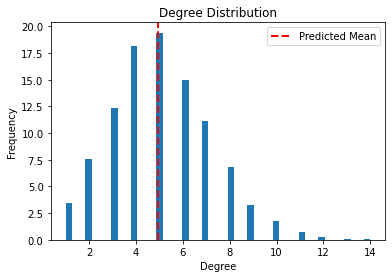




n: 500
p: 0.02
Average Clustering Coefficient (prediction = 0.02): 0.0198
Average Path Length (prediction = 2.7013): 2.9427783567134265


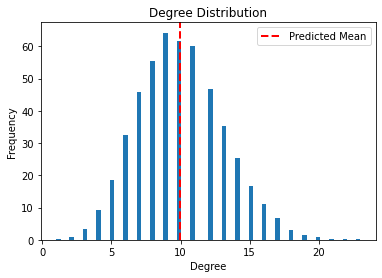




n: 1000
p: 0.01
Average Clustering Coefficient (prediction = 0.01): 0.0103
Average Path Length (prediction = 3.0013): 3.259943810477144


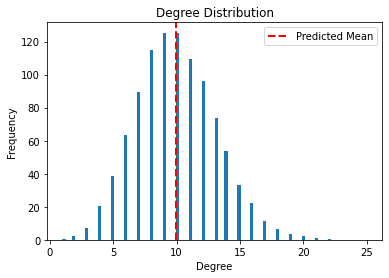

In [5]:
CONFIGURATIONS = [(100, 0.05), (500, 0.02), (1000, 0.01)]
TRIALS = 30

for n, p in CONFIGURATIONS:
    s_average_clustering_coefficient = 0
    s_average_path_length = 0
    degrees = []

    trial = 0
    while trial < TRIALS:
        try:
            G = ErdosRenyi(n, p)

            s_average_path_length += G.average_path_length()
            s_average_clustering_coefficient += G.average_clustering_coefficient()
            degrees.extend(G.degrees())

            trial += 1
        except:
            pass

    s_average_clustering_coefficient /= TRIALS
    s_average_path_length /= TRIALS

    prediction_average_path_lenght = np.log(n) / np.log((n - 1) * p)

    print(f"n: {n}")
    print(f"p: {p}")
    print(
        f"Average Clustering Coefficient (prediction = {p}): {round(s_average_clustering_coefficient, 4)}"
    )
    print(
        f"Average Path Length (prediction = {round(prediction_average_path_lenght, 4)}): {s_average_path_length}"
    )

    cnts, bins = np.histogram(degrees, bins="auto")
    cnts = list(map(lambda x: x / TRIALS, cnts))

    plt.bar(bins[:-1] + np.diff(bins) / 2, cnts, np.diff(bins))
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.axvline(
        x=(n - 1) * p, linewidth=2, color="r", linestyle="--", label="Predicted Mean"
    )
    plt.legend()
    plt.show()
    print("\n\n")